# DECIMER Image classifier example
In this Jupyter notebook you can find an example on how to use the DECIMER Image classifier model to classify an image into chemical structure or non-chemical structure.
We use 10 test data images, 5 chemical structures and 5 non-chemical structures.

## Import libraries

In [1]:
import os
from PIL import Image
import ipyplot

from decimer_image_classifier import DecimerImageClassifier


## Instantiation of DecimerImageClassifier

When instanciating the DecimerImageClassifier, the model and everything you need is loaded automatically.

In [2]:
decimer_classifier = DecimerImageClassifier()

## Example on 10 images

Here you can see 8 good examples of how the model performs and 2 bad examples, one for each possible class (CNP0460730.1_2.png and MMU298754.jpg)

CHEMBL1302040_4.png has a predicted score of 8.28140059345528e-18.
CHEMBL1463290_3.png has a predicted score of 7.881065029314315e-18.
CHEMBL2145065_4.png has a predicted score of 2.6838942037273176e-18.
CHEMBL552171_1.png has a predicted score of 6.2103429988725735e-18.
chinese91026.jpg has a predicted score of 1.0.
CNP0336783.1_4.png has a predicted score of 9.162759881769305e-18.
grapheme171839.png has a predicted score of 1.0.
random_scatter_plot_64933.png has a predicted score of 1.0.


c:\Users\Otto Brinkhaus\anaconda3\envs\RanDepict\lib\site-packages\ipyplot\_utils.py:95: FutureWarning: The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))



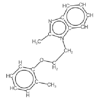
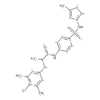
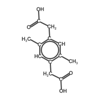
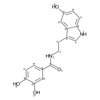
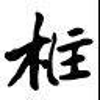
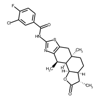
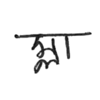
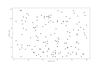


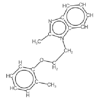
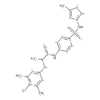
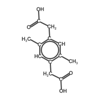
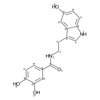
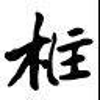
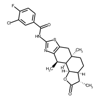
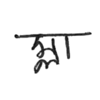
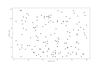

In [3]:
test_dir = './images/'
images = os.listdir(test_dir)
images.remove('MMU298754.jpg')
images.remove('CNP0460730.1_2.png')
images_loaded=[]
for img_path in images:
    img = Image.open(os.path.join(test_dir, img_path))
    score = decimer_classifier.get_classifier_score(img)
    images_loaded.append(img)
    print(f'{img_path} has a predicted score of {score}.')

ipyplot.plot_images(images_loaded, max_images=8, img_width=100)

CNP0460730.1_2.png has a predicted score of 0.9903053.


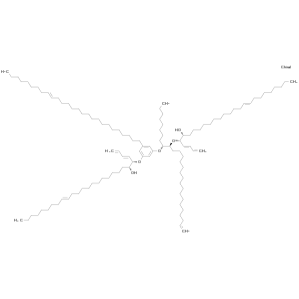

In [4]:
img = 'CNP0460730.1_2.png'
img_arr = Image.open(os.path.join(test_dir + img))
score = decimer_classifier.get_classifier_score(img_arr)
print('{} has a predicted score of {}.'.format(img,str(score)))
img_arr

MMU298754.jpg has a predicted score of 5.079423e-05.


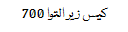

In [5]:
img = 'MMU298754.jpg'
img_arr = Image.open(os.path.join(test_dir + img))
score = decimer_classifier.get_classifier_score(img_arr)

print('{} has a predicted score of {}.'.format(img,str(score)))
img_arr

If you don't need the scores and just want to know whether or not an image contains a chemical structure depiction, you can simply call the method is_chemical_structure()

True
True
True
True
False
True
False
False



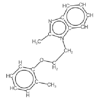
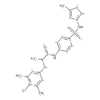
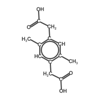
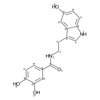
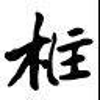
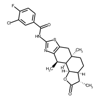
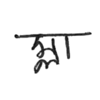
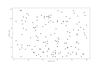


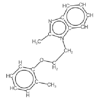
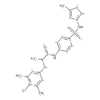
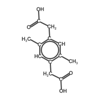
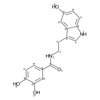
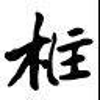
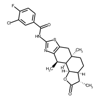
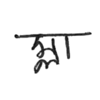
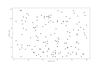

In [6]:
labels = []
for img in images_loaded:
    result = decimer_classifier.is_chemical_structure(img)
    print(result)
    labels.append(result)

ipyplot.plot_images(images_loaded, labels=labels, max_images=8, img_width=100)